# Pibal Analysis

The goal of this analysis is to predict the trend of pibal.

> Author: 1chooo  
> version: 1.0.0

### Import the package we need.

In [20]:
import csv
import math
import matplotlib.pyplot as plt

### Initialize the variable we need.

In [21]:
time, wd, elevation = 0, 0, 0
list_time, list_wd, list_elevation = [], [], []

### Get the data what We want.

In [22]:
inputFile = open("./data/pibal_data.csv", 'r')
dataReader = csv.reader(inputFile)

for line in dataReader:

    time = line[0]
    wd = line[1]
    elevation = line[2]

    list_time.append(time)
    list_wd.append(wd)
    list_elevation.append(elevation)

inputFile.close()

### Data Pre-solving.

In [23]:
del list_time[0]
del list_wd[0]
del list_elevation[0]

list_time_float, list_wd_float, list_elevation_float = [], [], []

for i in range(len(list_time)):
    time = float(list_time[i])
    list_time_float.append(time)

    wd = float(list_wd[i])
    list_wd_float.append(wd)

    elevation = float(list_elevation[i])
    list_elevation_float.append(elevation)

### Find the counting circumstances.

In [24]:
list_height = []
initial = 6.26
vector = 150.0 / 60.0

for i in list_time_float:
    height = i * vector
    height = initial + height
    list_height.append(height)

print("Height:", list_height)

list_ele_rad = []
for i in range(len(list_elevation_float)):
    angle = math.radians(list_elevation_float[i])
    angle = round(angle, 3)
    list_ele_rad.append(angle)

print("elevation in rad:", list_ele_rad)

list_wd_rad = []
angle = 0
for i in range(len(list_wd_float)):
    angle = math.radians(list_wd_float[i])
    angle = round(angle, 3)
    list_wd_rad.append(angle)

print("wind direction in rad:", list_wd_rad)

list_distance = []
d = 0
for i in range(0, 78):
    d = list_height[i] / math.tan(list_ele_rad[i])
    d = round(d, 3)
    list_distance.append(d)

print("Horizontal distance:", list_distance)

Height: [6.26, 81.26, 156.26, 231.26, 306.26, 381.26, 456.26, 531.26, 606.26, 681.26, 756.26, 831.26, 906.26, 981.26, 1056.26, 1131.26, 1206.26, 1281.26, 1356.26, 1431.26, 1506.26, 1581.26, 1656.26, 1731.26, 1806.26, 1881.26, 1956.26, 2031.26, 2106.26, 2181.26, 2256.26, 2331.26, 2406.26, 2481.26, 2556.26, 2631.26, 2706.26, 2781.26, 2856.26, 2931.26, 3006.26, 3081.26, 3156.26, 3231.26, 3306.26, 3381.26, 3456.26, 3531.26, 3606.26, 3681.26, 3756.26, 3831.26, 3906.26, 3981.26, 4056.26, 4131.26, 4206.26, 4281.26, 4356.26, 4431.26, 4506.26, 4581.26, 4656.26, 4731.26, 4806.26, 4881.26, 4956.26, 5031.26, 5106.26, 5181.26, 5256.26, 5331.26, 5406.26, 5481.26, 5556.26, 5631.26, 5706.26, 5781.26]
elevation in rad: [0.096, 0.548, 0.637, 0.688, 0.703, 0.691, 0.679, 0.688, 0.714, 0.768, 0.857, 0.96, 1.047, 1.122, 1.178, 1.215, 1.26, 1.318, 1.408, 1.477, 1.539, 1.501, 1.443, 1.388, 1.344, 1.3, 1.251, 1.197, 1.161, 1.133, 1.107, 1.084, 1.065, 1.042, 1.028, 1.009, 0.983, 0.96, 0.937, 0.915, 0.894, 0.874

### Import the formula and start to analyze the wind direction and wind speed in high sky.

In [25]:
list_E1E2 = []
e1e2 = 0
for i in range(1, len(list_height)):
    e1e2 = (list_distance[i] * math.sin(list_wd_rad[i])) - \
           (list_distance[i-1] * math.sin(list_wd_rad[i-1]))
    e1e2 = round(e1e2, 3)
    list_E1E2.append(e1e2)

print("E1E2:", list_E1E2)

list_N1N2 = []
n1n2 = 0
for i in range(1, len(list_height)):
    n1n2 = (list_distance[i] * math.cos(list_wd_rad[i])) - \
           (list_distance[i-1] * math.cos(list_wd_rad[i-1]))
    n1n2 = round(n1n2, 3)
    list_N1N2.append(n1n2)

print("N1N2:", list_N1N2)

alpha = 0
list_alpha = []
for i in range(len(list_E1E2)):
    alpha = math.atan(list_E1E2[i] / list_N1N2[i])
    alpha = round(alpha, 3)
    list_alpha.append(alpha)

print("alpha:", list_alpha)

E1E2: [-1.703, -2.42, 1.346, 24.954, 55.833, 57.644, 24.215, -7.932, -39.197, -67.599, -101.737, -5.672, -183.288, -70.674, -65.02, -1.339, 30.841, 83.17, 85.438, 113.134, 110.691, 104.113, 110.579, 97.617, 111.45, 129.208, 152.049, 117.97, 98.491, 102.178, 101.055, 91.83, 107.787, 75.127, 88.242, 120.732, 117.997, 121.675, 125.616, 130.56, 129.865, 134.135, 129.539, 124.695, 113.809, 156.293, 134.624, 137.554, 166.34, 222.672, 278.678, 282.679, 355.717, 395.393, 343.716, 389.215, 390.867, 438.109, 352.988, 375.293, 369.088, 356.85, 346.076, 310.32, 333.594, 304.948, 284.459, 371.392, 373.035, 353.183, 456.94, 403.007, 298.067, 511.935, 413.617, 424.01, 370.944]
N1N2: [-82.967, -82.175, -71.232, -76.747, -88.712, -91.113, -77.277, -58.611, -16.51, 38.22, 66.073, 58.601, 92.907, 82.671, 88.224, 59.866, 62.478, 91.539, 22.289, -20.416, -18.66, -22.045, -9.546, -10.388, 17.499, 18.245, 40.632, 64.444, 93.727, 44.985, 34.607, 46.941, 56.61, 81.361, 105.568, 102.553, 95.555, 105.207, 103.30

### alpha turn into degree

In [26]:
wd_list = []
for i in range(len(list_alpha)):
    a = math.degrees(list_alpha[i])
    a = a % 360
    wd_list.append(round(a, 2))

print("Wind Direction:", wd_list)

Wind Direction: [1.2, 1.66, 358.91, 342.01, 327.8, 327.69, 342.58, 7.73, 67.15, 299.5, 302.99, 354.5, 296.86, 319.49, 323.62, 358.74, 26.3, 42.28, 75.4, 280.24, 279.56, 281.96, 274.92, 276.06, 81.07, 81.99, 75.06, 61.36, 46.41, 66.23, 71.1, 62.91, 62.28, 42.74, 39.88, 49.68, 50.99, 49.16, 50.59, 52.65, 50.31, 59.36, 54.66, 50.53, 42.74, 47.84, 40.62, 48.07, 61.71, 75.29, 270.91, 277.15, 279.5, 284.2, 279.16, 274.4, 278.12, 275.55, 277.55, 270.22, 84.45, 75.0, 68.18, 59.76, 55.0, 54.37, 49.45, 55.0, 58.56, 54.26, 57.75, 60.39, 60.1, 64.97, 70.07, 68.3, 72.14]


### alpha turn into x-y axis

In [27]:
pP_qP = 0
ws_list = []
list_pP_qP = []

for i in range(len(list_E1E2)):
    pP_qP = list_E1E2[i] / math.sin(math.radians(wd_list[i]))
    list_pP_qP.append(pP_qP)
    ws = pP_qP / 30.0
    ws = abs(round(ws, 2))
    ws_list.append(ws)

print("Wind Speed:", ws_list)

Wind Speed: [2.71, 2.78, 2.36, 2.69, 3.49, 3.59, 2.7, 1.97, 1.42, 2.59, 4.04, 1.97, 6.85, 3.63, 3.65, 2.03, 2.32, 4.12, 2.94, 3.83, 3.74, 3.55, 3.7, 3.27, 3.76, 4.35, 5.25, 4.48, 4.53, 3.72, 3.56, 3.44, 4.06, 3.69, 4.59, 5.28, 5.06, 5.36, 5.42, 5.47, 5.63, 5.2, 5.29, 5.38, 5.59, 7.03, 6.89, 6.16, 6.3, 7.67, 9.29, 9.5, 12.02, 13.6, 11.61, 13.01, 13.16, 14.67, 11.87, 12.51, 12.36, 12.31, 12.43, 11.97, 13.57, 12.51, 12.48, 15.11, 14.57, 14.5, 18.01, 15.45, 11.46, 18.83, 14.67, 15.21, 12.99]


After solving the data and getting the results what we want then we plot the data in the figure to let the results visualize.

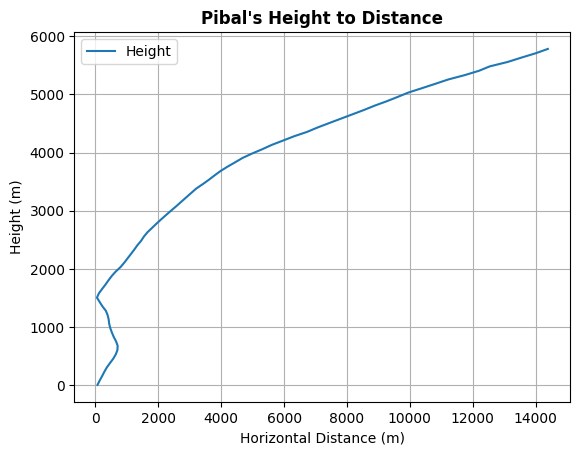

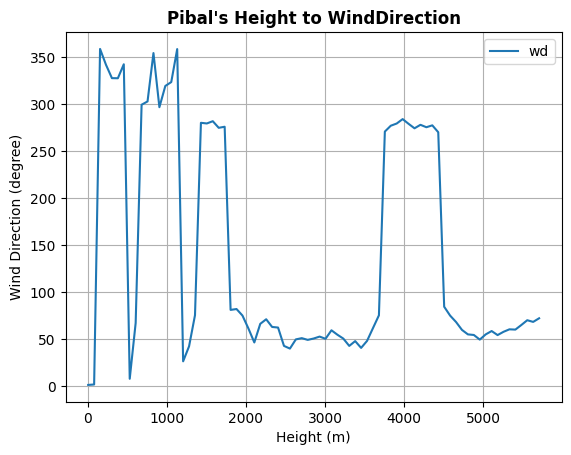

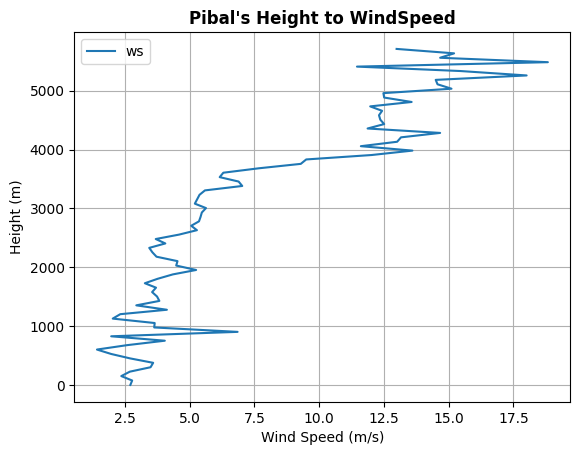

In [28]:
plt.figure("Pibal's Height to Horizontal Distance")
plt.plot(list_distance, list_height)
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Height (m)")
plt.legend(["Height"])
plt.title("Pibal's Height to Distance", fontweight = "bold")
plt.grid()
# plt.savefig('./image/Height_to_Distance.png', dpi = 300)

# Because the interval is the total minus one.
new_height = list_height        
del new_height[77]              

plt.figure("Pibal's Height to WindDirection")
plt.plot(new_height, wd_list)
plt.ylabel("Wind Direction (degree)")
plt.xlabel("Height (m)")
plt.legend(["wd"])
plt.title("Pibal's Height to WindDirection", fontweight = "bold")
plt.grid()
# plt.savefig('./image/Pibal_Height_to_WindDirection.png', dpi = 300)

plt.figure("Pibal's Height to WindSpeed")
plt.plot(ws_list, new_height)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Height (m)")
plt.legend(["ws"])
plt.title("Pibal's Height to WindSpeed", fontweight = "bold")
plt.grid()
# plt.savefig('./image/Pibal_Height_to_WindSpeed.png', dpi = 300)
plt.show()
